In [5]:
!pip install seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [7]:
fraud = pd.read_csv("D:\Projects(internship)\Fraud-DS\Fraud.csv")

In [8]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
resInt = 0
for i in range(len(fraud)):
    testInt = fraud['isFlaggedFraud'][i]
    resInt = resInt+testInt

print(resInt)

16


In [11]:
for i in range(len(fraud)):
    if fraud['isFlaggedFraud'][i] == 1:
        print(i)
        break

2736446


In [12]:
fraud.iloc[2736446]

step                     212
type                TRANSFER
amount            4953893.08
nameOrig          C728984460
oldbalanceOrg     4953893.08
newbalanceOrig    4953893.08
nameDest          C639921569
oldbalanceDest           0.0
newbalanceDest           0.0
isFraud                    1
isFlaggedFraud             1
Name: 2736446, dtype: object

Removing Steps

In [13]:
fraud.drop(columns='step')

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Finding out what was the percentage of amount transferred as compared to total amount in the bank.

In [14]:
fraud['%transferred'] = (fraud['amount']/fraud['oldbalanceOrg'])*100 

In [15]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,%transferred
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,5.783397
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,8.773495
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,100.000000
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,100.000000
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,28.079463
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,100.000000
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,100.000000
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,100.000000
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,100.000000


In [16]:
duplicate_total = fraud['nameOrig'].duplicated().sum()
print(duplicate_total)

9313


In [17]:
duplicate_Count = fraud['nameOrig'].duplicated()

In [18]:
print(duplicate_Count)

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: nameOrig, Length: 6362620, dtype: bool


In [19]:
type(duplicate_Count)

pandas.core.series.Series

In [20]:
value_counts = fraud['nameOrig'].value_counts()

In [21]:
count_dict = value_counts.to_dict()

In [22]:
fraud['Frequency'] = pd.NA
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,%transferred,Frequency
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,5.783397,NaN
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,8.773495,NaN
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,100.000000,NaN
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,100.000000,NaN
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,28.079463,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,100.000000,NaN
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,100.000000,NaN
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,100.000000,NaN
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,100.000000,NaN


In [23]:
last_occurences = {}

for i in range(len(fraud)):
    cId = fraud['nameOrig'][i]
    step1 = fraud['step'][i]

    if cId in last_occurences:
        last_index,last_step = last_occurences[cId]
        fraud.at[last_index,'Frequency'] = step1-last_step
    
    last_occurences[cId] = (i,step1)

In [24]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,%transferred,Frequency
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,5.783397,NaN
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,8.773495,NaN
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,100.000000,NaN
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,100.000000,NaN
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,28.079463,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,100.000000,NaN
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,100.000000,NaN
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,100.000000,NaN
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,100.000000,NaN


In [25]:
fraud['Frequency'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6362620 entries, 0 to 6362619
Series name: Frequency
Non-Null Count  Dtype 
--------------  ----- 
9313 non-null   object
dtypes: object(1)
memory usage: 48.5+ MB


So Non-Null are 9313 that is precisely the number of duplicates so hence every multiple transaction from one account has been mapped.

Now , NA won't help in our modelling so we need to get around that as well
I will be replcing NA with the maximum number of steps possible in our simulation(743) to signify no other transaction was done for that particular account in our simulation.

In [26]:
fraud['Frequency'] = fraud['Frequency'].fillna(743)
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,%transferred,Frequency
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,5.783397,743
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,8.773495,743
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,100.000000,743
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,100.000000,743
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,28.079463,743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,100.000000,743
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,100.000000,743
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,100.000000,743
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,100.000000,743


Checking if "nameOrig" has anything other than "c....."

In [27]:
testList = []
for i in range(len(fraud)):
    testString = fraud['nameOrig'][i]
    if testString[0] != 'C':
        testList.append(fraud['nameOrig'][i])
    else:
        continue

In [28]:
testList

[]

So , Every Transaction has been started by a consumer
And therefore we can actually drop this column because it's just an ID and hence won't help in predictive modelling

Let us now drop Step and NameOrig as we have used them and they will add no value to predictive modelling

In [29]:
fraud = fraud.drop(columns='step')
fraud = fraud.drop(columns='nameOrig')
fraud

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,%transferred,Frequency
0,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,5.783397,743
1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,8.773495,743
2,TRANSFER,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,100.000000,743
3,CASH_OUT,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,100.000000,743
4,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,28.079463,743
...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,100.000000,743
6362616,TRANSFER,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,100.000000,743
6362617,CASH_OUT,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,100.000000,743
6362618,TRANSFER,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,100.000000,743


Checking how many Frauds are done by customers and how many by Merchants

In [30]:
fraudByMerchant = 0
fraudByCustomer = 0
for i in range(len(fraud)):
    cId = fraud['nameDest'][i]
    if cId[0] == 'C' and fraud['isFraud'][i] == 1:
        fraudByCustomer = fraudByCustomer+1

    if cId[0] == 'M' and fraud['isFraud'][i] == 1:
        fraudByMerchant = fraudByMerchant+1

In [31]:
print(fraudByCustomer)

8213


In [32]:
print(fraudByMerchant)

0


In [33]:
fraud['isFraud'].sum()

8213

So, Fraud by Merchants is 0.

Now Lets look at the amount that is incoming into the account of customers we can also use a percentage metric here as well also we can replace IDs with whether the reciever was a customer or a merchant.

In [34]:
fraud['%Received'] = None

In [35]:
dubious = []
for i in range(len(fraud)):
    cId = fraud['nameDest'][i] 
    if fraud['newbalanceDest'][i] == 0 and cId[0] == 'C':
        dubious.append(fraud['isFraud'][i]) 

In [36]:
dubious

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


So there can be instances of Destination account having no balance but still it not being a fraud.

In [37]:
for i in range(len(fraud)):
    cId = fraud.at[i, 'nameDest']  # Use .at for safe and efficient access
    if cId[0] == 'C':
        fraud.at[i, 'nameDest'] = 'C'
        if fraud.at[i, 'newbalanceDest'] == 0:
            continue
        else:
            fraud.at[i, '%Received'] = (fraud.at[i, 'amount'] / fraud.at[i, 'newbalanceDest']) * 100
    else:
        fraud.at[i, 'nameDest'] = 'M'

In [38]:
fraud

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,%transferred,Frequency,%Received
0,PAYMENT,9839.64,170136.00,160296.36,M,0.00,0.00,0,0,5.783397,743,None
1,PAYMENT,1864.28,21249.00,19384.72,M,0.00,0.00,0,0,8.773495,743,None
2,TRANSFER,181.00,181.00,0.00,C,0.00,0.00,1,0,100.000000,743,None
3,CASH_OUT,181.00,181.00,0.00,C,21182.00,0.00,1,0,100.000000,743,None
4,PAYMENT,11668.14,41554.00,29885.86,M,0.00,0.00,0,0,28.079463,743,None
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,C,0.00,339682.13,1,0,100.000000,743,100.0
6362616,TRANSFER,6311409.28,6311409.28,0.00,C,0.00,0.00,1,0,100.000000,743,None
6362617,CASH_OUT,6311409.28,6311409.28,0.00,C,68488.84,6379898.11,1,0,100.000000,743,98.92649
6362618,TRANSFER,850002.52,850002.52,0.00,C,0.00,0.00,1,0,100.000000,743,None


So now as we have %Transferred we don't need the account details.

In [39]:
fraud = fraud.drop(columns='oldbalanceOrg')
fraud = fraud.drop(columns='newbalanceOrig')
fraud

,type,amount,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,%transferred,Frequency,%Received
0,PAYMENT,9839.64,M,0.00,0.00,0,0,5.783397,743,None
1,PAYMENT,1864.28,M,0.00,0.00,0,0,8.773495,743,None
2,TRANSFER,181.00,C,0.00,0.00,1,0,100.000000,743,None
3,CASH_OUT,181.00,C,21182.00,0.00,1,0,100.000000,743,None
4,PAYMENT,11668.14,M,0.00,0.00,0,0,28.079463,743,None
...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C,0.00,339682.13,1,0,100.000000,743,100.0
6362616,TRANSFER,6311409.28,C,0.00,0.00,1,0,100.000000,743,None
6362617,CASH_OUT,6311409.28,C,68488.84,6379898.11,1,0,100.000000,743,98.92649
6362618,TRANSFER,850002.52,C,0.00,0.00,1,0,100.000000,743,None


Reorder the DataFrame columns

In [40]:
cols = [col for col in fraud.columns if col not in ['isFraud', 'isFlaggedFraud']] + ['isFlaggedFraud','isFraud']
fraud = fraud[cols]
fraud

,type,amount,nameDest,oldbalanceDest,newbalanceDest,%transferred,Frequency,%Received,isFlaggedFraud,isFraud
0,PAYMENT,9839.64,M,0.00,0.00,5.783397,743,None,0,0
1,PAYMENT,1864.28,M,0.00,0.00,8.773495,743,None,0,0
2,TRANSFER,181.00,C,0.00,0.00,100.000000,743,None,0,1
3,CASH_OUT,181.00,C,21182.00,0.00,100.000000,743,None,0,1
4,PAYMENT,11668.14,M,0.00,0.00,28.079463,743,None,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C,0.00,339682.13,100.000000,743,100.0,0,1
6362616,TRANSFER,6311409.28,C,0.00,0.00,100.000000,743,None,0,1
6362617,CASH_OUT,6311409.28,C,68488.84,6379898.11,100.000000,743,98.92649,0,1
6362618,TRANSFER,850002.52,C,0.00,0.00,100.000000,743,None,0,1


Now I will be doing some Feature Analysis and EDA

In [41]:
fraud_count = fraud.groupby('type')['isFraud'].sum().reset_index()

In [42]:
fraud_count

,type,isFraud
0,CASH_IN,0
1,CASH_OUT,4116
2,DEBIT,0
3,PAYMENT,0
4,TRANSFER,4097


Plotting

C:\Users\prana\AppData\Local\Temp\ipykernel_10648\188890030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='isFraud', data=fraud_count, palette='viridis')


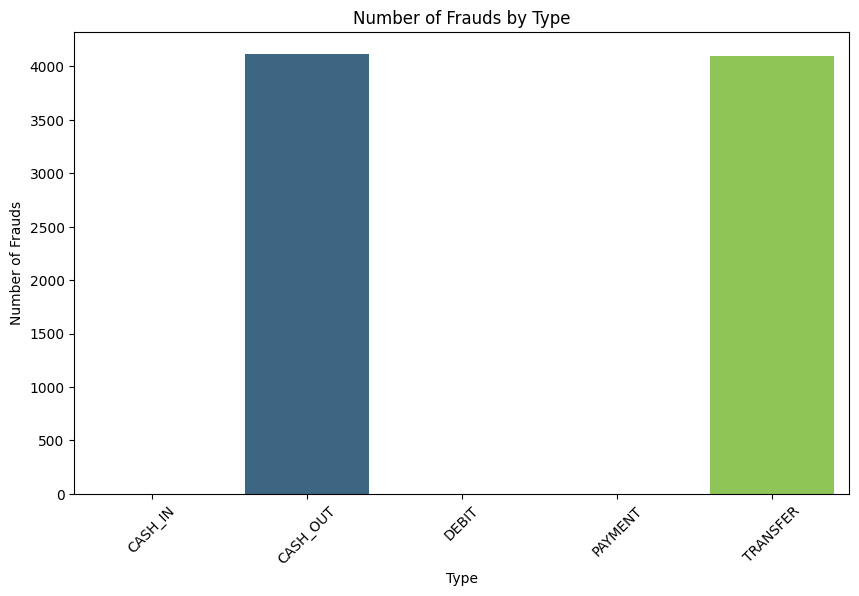

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='isFraud', data=fraud_count, palette='viridis')
plt.title('Number of Frauds by Type')
plt.xlabel('Type')
plt.ylabel('Number of Frauds')
plt.xticks(rotation=45)
plt.show()

So, We can see that the frauds only occur when it is a "Cash Out" or "Transfer"

Box Plot for amount vs isFraud

C:\Users\prana\AppData\Local\Temp\ipykernel_10648\2616914848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=fraud, palette='coolwarm')


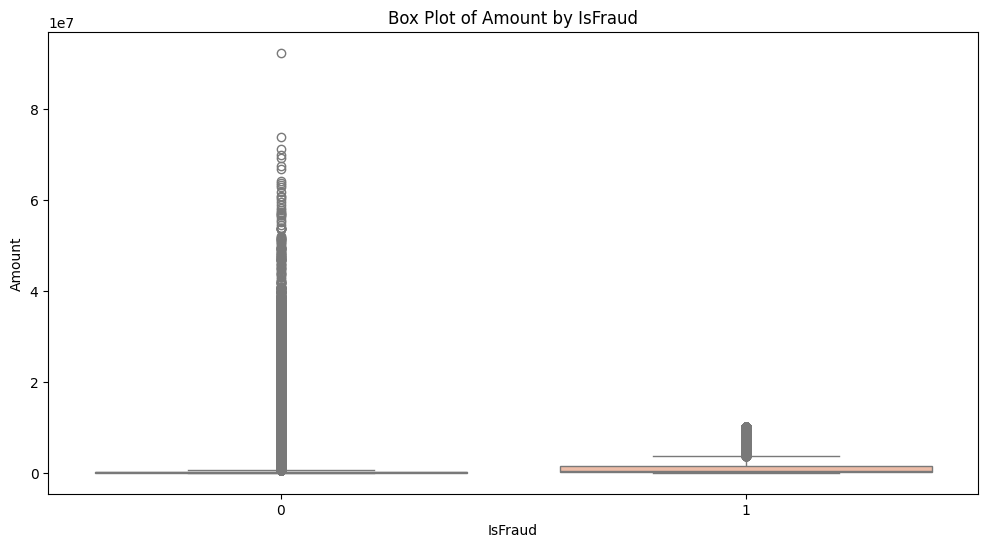

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=fraud, palette='coolwarm')
plt.title('Box Plot of Amount by IsFraud')
plt.xlabel('IsFraud')
plt.ylabel('Amount')
plt.show()

As we can see nothing is clear in this so we need to trim down our data in order to make sense of it so:

I am removing Merchants as they have no frauds.

Also I am removing CASH_IN , DEBIT and PAYMENT as it has no frauds to Trim the Data.

In [45]:
DestName = ['M']

fraud = fraud[~fraud['nameDest'].isin(DestName)]
fraud

,type,amount,nameDest,oldbalanceDest,newbalanceDest,%transferred,Frequency,%Received,isFlaggedFraud,isFraud
2,TRANSFER,181.00,C,0.00,0.00,100.000000,743,None,0,1
3,CASH_OUT,181.00,C,21182.00,0.00,100.000000,743,None,0,1
9,DEBIT,5337.77,C,41898.00,40348.79,12.794271,743,13.229071,0,0
10,DEBIT,9644.94,C,10845.00,157982.12,216.012094,743,6.105083,0,0
15,CASH_OUT,229133.94,C,5083.00,51513.44,1495.164372,743,444.804191,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C,0.00,339682.13,100.000000,743,100.0,0,1
6362616,TRANSFER,6311409.28,C,0.00,0.00,100.000000,743,None,0,1
6362617,CASH_OUT,6311409.28,C,68488.84,6379898.11,100.000000,743,98.92649,0,1
6362618,TRANSFER,850002.52,C,0.00,0.00,100.000000,743,None,0,1


In [46]:
TypeToRemove = ['CASH_IN','DEBIT','PAYMENT']

fraud = fraud[~fraud['type'].isin(TypeToRemove)]
fraud

,type,amount,nameDest,oldbalanceDest,newbalanceDest,%transferred,Frequency,%Received,isFlaggedFraud,isFraud
2,TRANSFER,181.00,C,0.00,0.00,100.000000,743,None,0,1
3,CASH_OUT,181.00,C,21182.00,0.00,100.000000,743,None,0,1
15,CASH_OUT,229133.94,C,5083.00,51513.44,1495.164372,743,444.804191,0,0
19,TRANSFER,215310.30,C,22425.00,0.00,30540.468085,743,None,0,0
24,TRANSFER,311685.89,C,6267.00,2719172.89,2876.657960,743,11.462526,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C,0.00,339682.13,100.000000,743,100.0,0,1
6362616,TRANSFER,6311409.28,C,0.00,0.00,100.000000,743,None,0,1
6362617,CASH_OUT,6311409.28,C,68488.84,6379898.11,100.000000,743,98.92649,0,1
6362618,TRANSFER,850002.52,C,0.00,0.00,100.000000,743,None,0,1


So as every Destination Name is 'C' let's remove this column as well.

In [47]:
fraud = fraud.drop(columns='nameDest')

In [48]:
fraud

,type,amount,oldbalanceDest,newbalanceDest,%transferred,Frequency,%Received,isFlaggedFraud,isFraud
2,TRANSFER,181.00,0.00,0.00,100.000000,743,None,0,1
3,CASH_OUT,181.00,21182.00,0.00,100.000000,743,None,0,1
15,CASH_OUT,229133.94,5083.00,51513.44,1495.164372,743,444.804191,0,0
19,TRANSFER,215310.30,22425.00,0.00,30540.468085,743,None,0,0
24,TRANSFER,311685.89,6267.00,2719172.89,2876.657960,743,11.462526,0,0
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,0.00,339682.13,100.000000,743,100.0,0,1
6362616,TRANSFER,6311409.28,0.00,0.00,100.000000,743,None,0,1
6362617,CASH_OUT,6311409.28,68488.84,6379898.11,100.000000,743,98.92649,0,1
6362618,TRANSFER,850002.52,0.00,0.00,100.000000,743,None,0,1


Table is still quite large we can drop the values with not sufficient Receiving account data(i.e., Rows with %Received as None)

In [49]:
# Convert None to NaN
fraud['%Received'] = fraud['%Received'].replace({None: np.nan})
fraud

,type,amount,oldbalanceDest,newbalanceDest,%transferred,Frequency,%Received,isFlaggedFraud,isFraud
2,TRANSFER,181.00,0.00,0.00,100.000000,743,NaN,0,1
3,CASH_OUT,181.00,21182.00,0.00,100.000000,743,NaN,0,1
15,CASH_OUT,229133.94,5083.00,51513.44,1495.164372,743,444.804191,0,0
19,TRANSFER,215310.30,22425.00,0.00,30540.468085,743,NaN,0,0
24,TRANSFER,311685.89,6267.00,2719172.89,2876.657960,743,11.462526,0,0
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,0.00,339682.13,100.000000,743,100.000000,0,1
6362616,TRANSFER,6311409.28,0.00,0.00,100.000000,743,NaN,0,1
6362617,CASH_OUT,6311409.28,68488.84,6379898.11,100.000000,743,98.926490,0,1
6362618,TRANSFER,850002.52,0.00,0.00,100.000000,743,NaN,0,1


In [50]:
fraud_filtered = fraud.dropna(subset=['%Received'])

In [51]:
fraud = fraud_filtered
fraud

,type,amount,oldbalanceDest,newbalanceDest,%transferred,Frequency,%Received,isFlaggedFraud,isFraud
15,CASH_OUT,229133.94,5083.00,51513.44,1495.164372,743,444.804191,0,0
24,TRANSFER,311685.89,6267.00,2719172.89,2876.657960,743,11.462526,0,0
42,CASH_OUT,110414.71,288800.00,2415.16,411.298282,743,4571.734792,0,0
47,CASH_OUT,56953.90,70253.00,64106.18,2932.714390,743,88.843073,0,0
48,CASH_OUT,5346.89,652637.00,6453430.91,inf,743,0.082853,0,0
...,...,...,...,...,...,...,...,...,...
6362611,CASH_OUT,63416.99,276433.18,339850.17,100.000000,743,18.660279,0,1
6362613,CASH_OUT,1258818.82,503464.50,1762283.33,100.000000,743,71.431126,0,1
6362615,CASH_OUT,339682.13,0.00,339682.13,100.000000,743,100.000000,0,1
6362617,CASH_OUT,6311409.28,68488.84,6379898.11,100.000000,743,98.926490,0,1


Removing any non-numeric value for 'amount', 'oldbalanceDest', 'newbalanceDest', '%transferred', 'Frequency', '%Received'.

In [52]:
# Replace inf and -inf with NaN
fraud.replace([np.inf, -np.inf], np.nan, inplace=True)

columns_to_check = ['amount', 'oldbalanceDest', 'newbalanceDest', '%transferred', 'Frequency', '%Received']
fraud = fraud.dropna(subset=columns_to_check)
fraud

C:\Users\prana\AppData\Local\Temp\ipykernel_10648\1581748500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud.replace([np.inf, -np.inf], np.nan, inplace=True)


,type,amount,oldbalanceDest,newbalanceDest,%transferred,Frequency,%Received,isFlaggedFraud,isFraud
15,CASH_OUT,229133.94,5083.00,51513.44,1495.164372,743,444.804191,0,0
24,TRANSFER,311685.89,6267.00,2719172.89,2876.657960,743,11.462526,0,0
42,CASH_OUT,110414.71,288800.00,2415.16,411.298282,743,4571.734792,0,0
47,CASH_OUT,56953.90,70253.00,64106.18,2932.714390,743,88.843073,0,0
58,TRANSFER,62610.80,517.00,8383.29,79.139975,743,746.852369,0,0
...,...,...,...,...,...,...,...,...,...
6362611,CASH_OUT,63416.99,276433.18,339850.17,100.000000,743,18.660279,0,1
6362613,CASH_OUT,1258818.82,503464.50,1762283.33,100.000000,743,71.431126,0,1
6362615,CASH_OUT,339682.13,0.00,339682.13,100.000000,743,100.000000,0,1
6362617,CASH_OUT,6311409.28,68488.84,6379898.11,100.000000,743,98.926490,0,1


Now as Percentage of amount transferred and Percantage of Amount of the Total Amount in the account coming from that one transaction doesn't make sense and probably infer a mistake in readings we'll remove those values as well.

In [53]:
fraud = fraud[ (fraud['%transferred']<=100) & (fraud['%Received']<=100) ]
fraud

,type,amount,oldbalanceDest,newbalanceDest,%transferred,Frequency,%Received,isFlaggedFraud,isFraud
516,TRANSFER,7206.33,21308.00,18161.79,28.903939,743,39.678523,0,0
665,CASH_OUT,227768.63,530123.48,1412484.09,22.518657,743,16.125394,0,0
666,CASH_OUT,172986.70,686295.71,1517262.16,22.073142,743,11.401240,0,0
817,CASH_OUT,116206.75,216670.10,500631.71,40.979558,743,23.212023,0,0
818,CASH_OUT,30331.38,105733.69,1015132.48,18.122814,743,2.987923,0,0
...,...,...,...,...,...,...,...,...,...
6362611,CASH_OUT,63416.99,276433.18,339850.17,100.000000,743,18.660279,0,1
6362613,CASH_OUT,1258818.82,503464.50,1762283.33,100.000000,743,71.431126,0,1
6362615,CASH_OUT,339682.13,0.00,339682.13,100.000000,743,100.000000,0,1
6362617,CASH_OUT,6311409.28,68488.84,6379898.11,100.000000,743,98.926490,0,1


So Maximum Data Cleaning is done I have replaced Account Details with percentages as:

For the Sender if Maximum amount from the account is sent and very minimum is remaining it can be a sign of Fraud which is covered in Percentages as more the percentage it accounts for the amount of account that is being emptied.

For the Reciever if the account is new or has no money it can be a sign of fraud and therefore %Received will take care of it as it will show of the new total amount in the bank how much of it has came through the latest transaction.

So, It'll not be a bad decision to remove the Destination Account's information

In [54]:
fraud = fraud.drop(columns='oldbalanceDest')
fraud = fraud.drop(columns='newbalanceDest')
fraud

,type,amount,%transferred,Frequency,%Received,isFlaggedFraud,isFraud
516,TRANSFER,7206.33,28.903939,743,39.678523,0,0
665,CASH_OUT,227768.63,22.518657,743,16.125394,0,0
666,CASH_OUT,172986.70,22.073142,743,11.401240,0,0
817,CASH_OUT,116206.75,40.979558,743,23.212023,0,0
818,CASH_OUT,30331.38,18.122814,743,2.987923,0,0
...,...,...,...,...,...,...,...
6362611,CASH_OUT,63416.99,100.000000,743,18.660279,0,1
6362613,CASH_OUT,1258818.82,100.000000,743,71.431126,0,1
6362615,CASH_OUT,339682.13,100.000000,743,100.000000,0,1
6362617,CASH_OUT,6311409.28,100.000000,743,98.926490,0,1


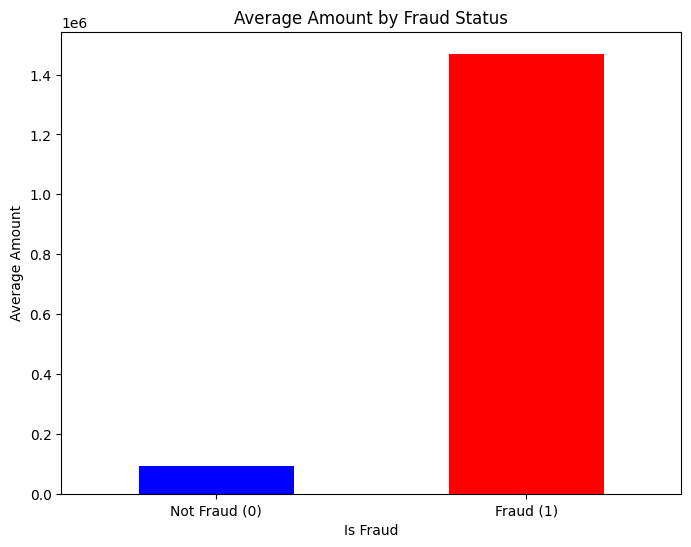

In [55]:
average_amount = fraud.groupby('isFraud')['amount'].mean()

# Plot the results
average_amount.plot(kind='bar', color=['blue', 'red'], figsize=(8, 6))

plt.title('Average Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Average Amount')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.show()

So , As we can see Amount when a fraud is done is significantly higher than when it's not.

ScatterPlot of Amount where Fraud is done vs not done

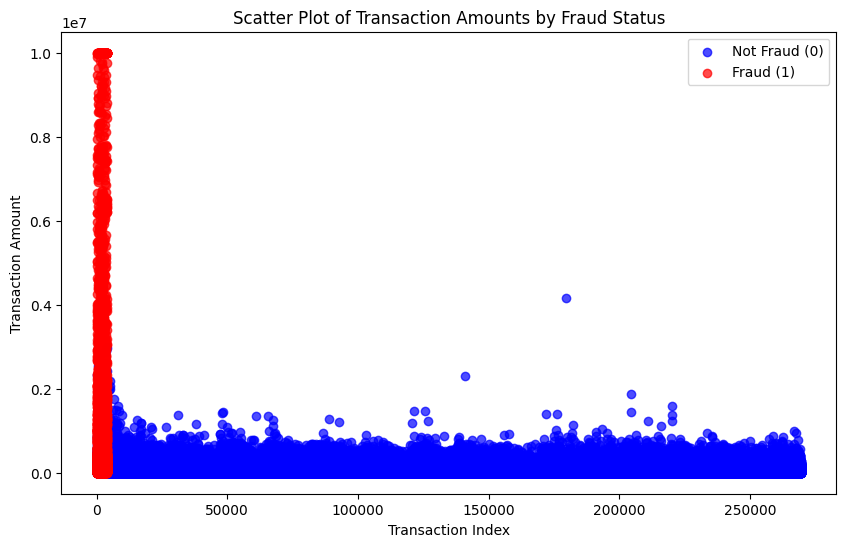

In [56]:
amount_fraud = fraud[fraud['isFraud'] == 1]['amount']
amount_non_fraud = fraud[fraud['isFraud'] == 0]['amount']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(amount_non_fraud)), amount_non_fraud, color='blue', label='Not Fraud (0)', alpha=0.7)
plt.scatter(range(len(amount_fraud)), amount_fraud, color='red', label='Fraud (1)', alpha=0.7)

plt.title('Scatter Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

BoxPlot

<Figure size 1000x600 with 0 Axes>

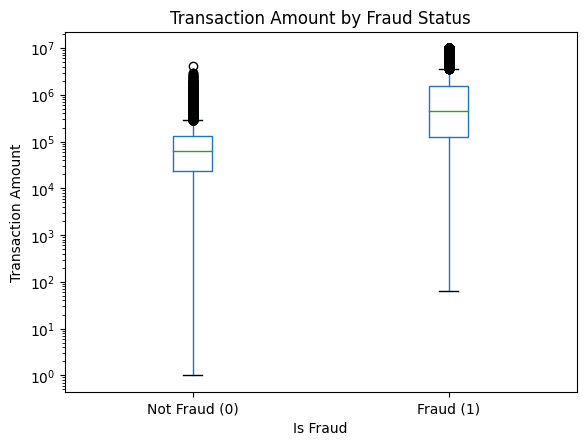

In [57]:
plt.figure(figsize=(10, 6))
fraud.boxplot(column='amount', by='isFraud', grid=False)

plt.title('Transaction Amount by Fraud Status')
plt.suptitle('')  
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.xticks([1, 2], ['Not Fraud (0)', 'Fraud (1)'])
plt.yscale('log')  
plt.show()

A violin plot is a data visualization that combines aspects of box plots and density plots to show the distribution of a variable. In this case, it illustrates the distribution of transaction amounts for both fraudulent and non-fraudulent transactions. The width of the "violin" at different amounts represents the density of transactions, helping to reveal how transaction amounts are distributed and where fraud is more likely to occur.

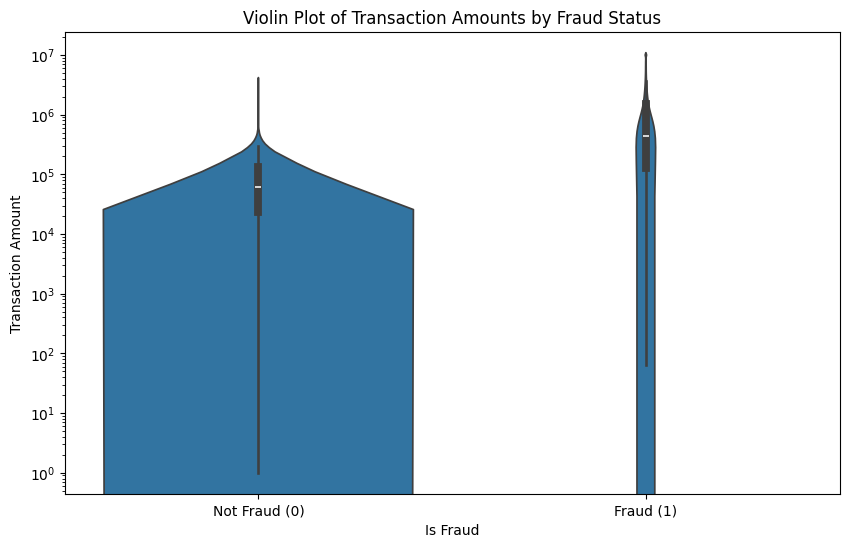

In [58]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='amount', data=fraud)

plt.title('Violin Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.yscale('log')  # Optional: Use log scale if amounts vary widely
plt.show()

These observations show that while fraud can happen with any amount, larger transactions are more likely to be fraudulent, suggesting the need to pay extra attention to big transactions.

Frequency vs isFraud

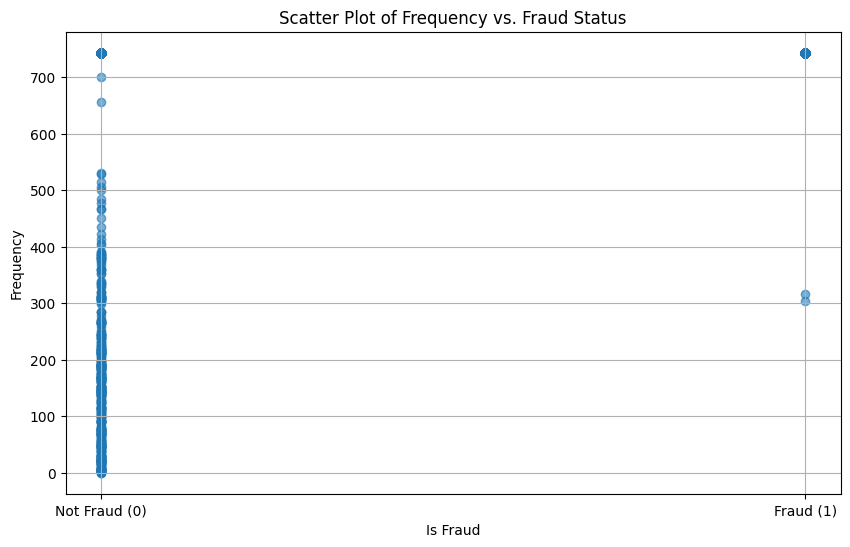

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(fraud['isFraud'], fraud['Frequency'], alpha=0.6)

plt.title('Scatter Plot of Frequency vs. Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.grid(True)
plt.show()

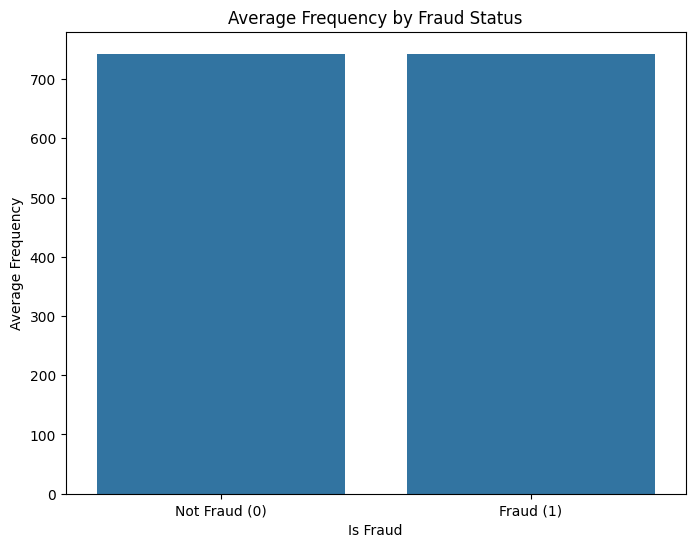

In [61]:
avg_frequency = fraud.groupby('isFraud')['Frequency'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='isFraud', y='Frequency', data=avg_frequency)

plt.title('Average Frequency by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Average Frequency')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.show()

So The above two Plots show no significant relationship between frequency and Fraud

The Metric was created to capture if there are several repeated transactions and how they correspond to fraud but dataset does not have such cases so we'll drop this column as well.

In [63]:
fraud = fraud.drop(columns='Frequency')

In [64]:
fraud

,type,amount,%transferred,%Received,isFlaggedFraud,isFraud
516,TRANSFER,7206.33,28.903939,39.678523,0,0
665,CASH_OUT,227768.63,22.518657,16.125394,0,0
666,CASH_OUT,172986.70,22.073142,11.401240,0,0
817,CASH_OUT,116206.75,40.979558,23.212023,0,0
818,CASH_OUT,30331.38,18.122814,2.987923,0,0
...,...,...,...,...,...,...
6362611,CASH_OUT,63416.99,100.000000,18.660279,0,1
6362613,CASH_OUT,1258818.82,100.000000,71.431126,0,1
6362615,CASH_OUT,339682.13,100.000000,100.000000,0,1
6362617,CASH_OUT,6311409.28,100.000000,98.926490,0,1


Percentages vs isFraud

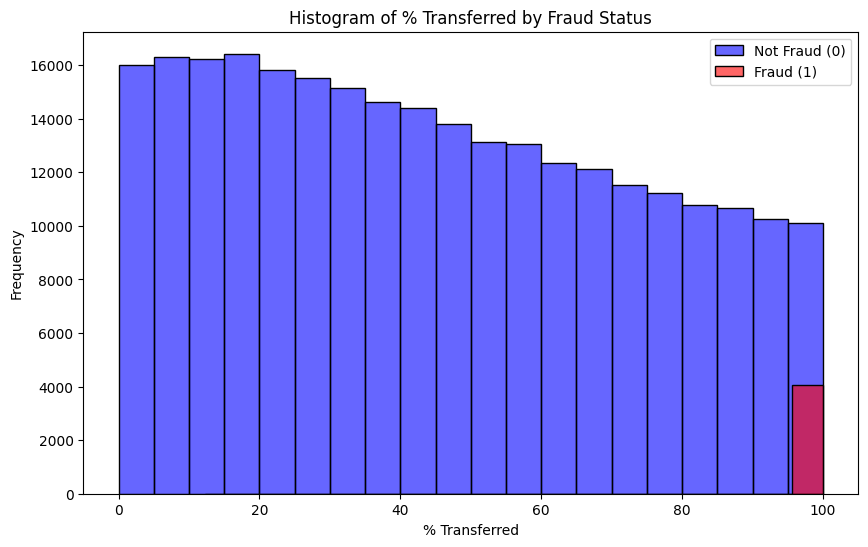

In [65]:
plt.figure(figsize=(10, 6))

# Histogram for non-fraudulent transactions
sns.histplot(fraud[fraud['isFraud'] == 0]['%transferred'], bins=20, color='blue', label='Not Fraud (0)', alpha=0.6)

# Histogram for fraudulent transactions
sns.histplot(fraud[fraud['isFraud'] == 1]['%transferred'], bins=20, color='red', label='Fraud (1)', alpha=0.6)

plt.title('Histogram of % Transferred by Fraud Status')
plt.xlabel('% Transferred')
plt.ylabel('Frequency')
plt.legend()
plt.show()

So as we can see there is only a fraud if maximum amount of money(in the range 90-100%) is getting transferred.

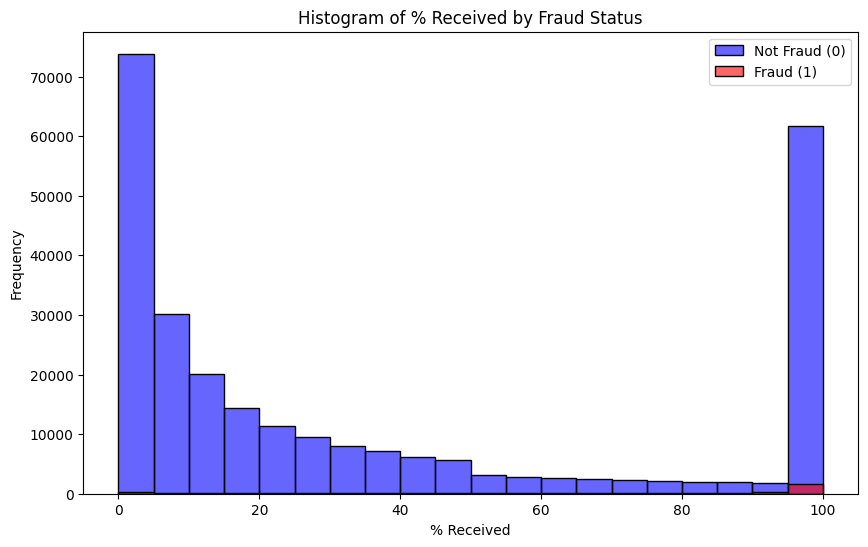

In [66]:
plt.figure(figsize=(10, 6))

# Histogram for non-fraudulent transactions
sns.histplot(fraud[fraud['isFraud'] == 0]['%Received'], bins=20, color='blue', label='Not Fraud (0)', alpha=0.6)

# Histogram for fraudulent transactions
sns.histplot(fraud[fraud['isFraud'] == 1]['%Received'], bins=20, color='red', label='Fraud (1)', alpha=0.6)

plt.title('Histogram of % Received by Fraud Status')
plt.xlabel('% Received')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Again Can be observed that it is a when maximum amount of that new account came from that one transaction.

C:\Users\prana\AppData\Local\Temp\ipykernel_10648\1481798025.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[fraud['isFraud'] == 0]['%transferred'], color='blue', label='Not Fraud (0)', shade=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_10648\1481798025.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[fraud['isFraud'] == 1]['%transferred'], color='red', label='Fraud (1)', shade=True)


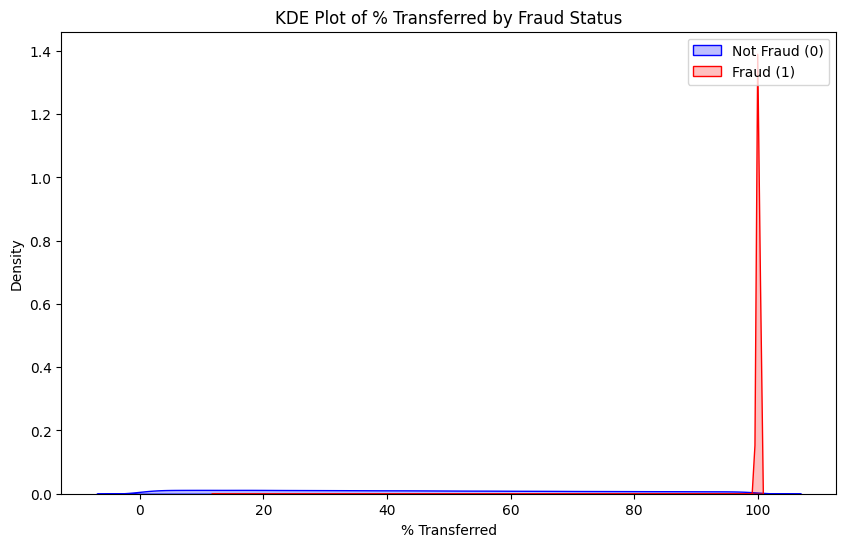

In [67]:
plt.figure(figsize=(10, 6))

sns.kdeplot(fraud[fraud['isFraud'] == 0]['%transferred'], color='blue', label='Not Fraud (0)', shade=True)
sns.kdeplot(fraud[fraud['isFraud'] == 1]['%transferred'], color='red', label='Fraud (1)', shade=True)

plt.title('KDE Plot of % Transferred by Fraud Status')
plt.xlabel('% Transferred')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_10648\3771738637.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[fraud['isFraud'] == 0]['%Received'], color='blue', label='Not Fraud (0)', shade=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_10648\3771738637.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[fraud['isFraud'] == 1]['%Received'], color='red', label='Fraud (1)', shade=True)


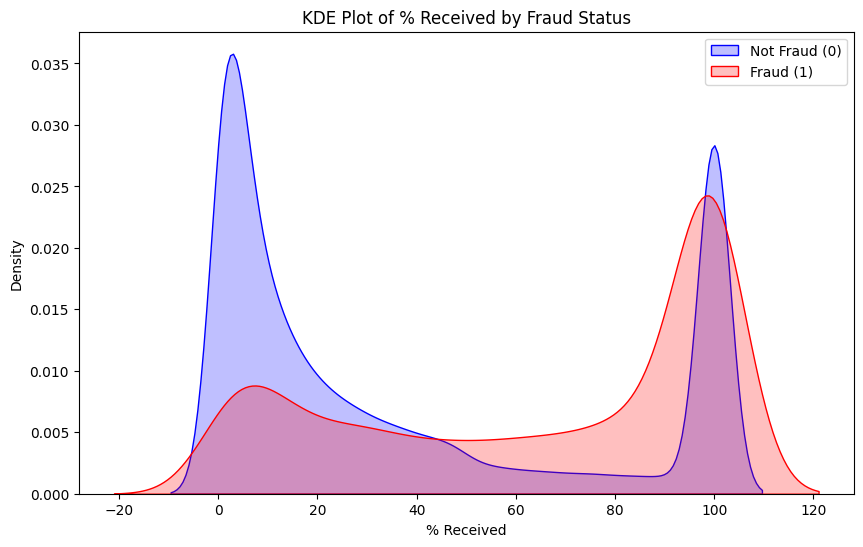

In [68]:
plt.figure(figsize=(10, 6))

sns.kdeplot(fraud[fraud['isFraud'] == 0]['%Received'], color='blue', label='Not Fraud (0)', shade=True)
sns.kdeplot(fraud[fraud['isFraud'] == 1]['%Received'], color='red', label='Fraud (1)', shade=True)

plt.title('KDE Plot of % Received by Fraud Status')
plt.xlabel('% Received')
plt.ylabel('Density')
plt.legend()
plt.show()

c:\Users\prana\miniconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


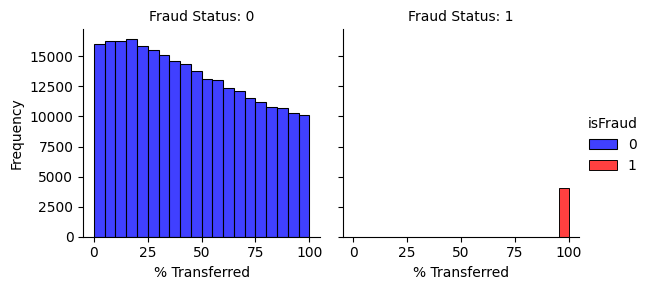

In [69]:
g = sns.FacetGrid(fraud, col='isFraud', hue='isFraud', palette={0: 'blue', 1: 'red'}, col_wrap=2)
g.map(sns.histplot, '%transferred', bins=20)

g.add_legend()
g.set_axis_labels('% Transferred', 'Frequency')
g.set_titles('Fraud Status: {col_name}')
plt.show()


c:\Users\prana\miniconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


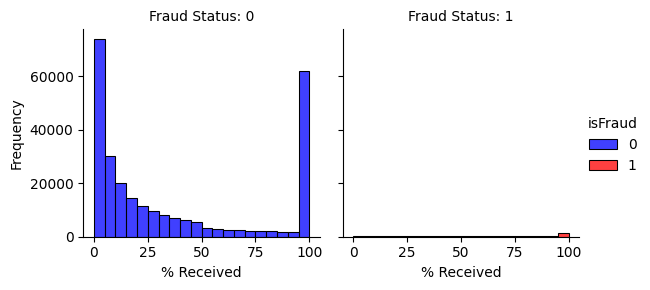

In [70]:
g = sns.FacetGrid(fraud, col='isFraud', hue='isFraud', palette={0: 'blue', 1: 'red'}, col_wrap=2)
g.map(sns.histplot, '%Received', bins=20)

g.add_legend()
g.set_axis_labels('% Received', 'Frequency')
g.set_titles('Fraud Status: {col_name}')
plt.show()

Most instances of fraud occur when the percentage transferred is between 90% and 100%, indicating that higher transfer percentages are more strongly associated with fraudulent transactions.

In [71]:
fraud

,type,amount,%transferred,%Received,isFlaggedFraud,isFraud
516,TRANSFER,7206.33,28.903939,39.678523,0,0
665,CASH_OUT,227768.63,22.518657,16.125394,0,0
666,CASH_OUT,172986.70,22.073142,11.401240,0,0
817,CASH_OUT,116206.75,40.979558,23.212023,0,0
818,CASH_OUT,30331.38,18.122814,2.987923,0,0
...,...,...,...,...,...,...
6362611,CASH_OUT,63416.99,100.000000,18.660279,0,1
6362613,CASH_OUT,1258818.82,100.000000,71.431126,0,1
6362615,CASH_OUT,339682.13,100.000000,100.000000,0,1
6362617,CASH_OUT,6311409.28,100.000000,98.926490,0,1


In [72]:
totalsum = fraud['isFlaggedFraud'].sum()
print(totalsum)

0


There are no values in isFlaggedFraud remaining now so I will remove this column as well as it will hamper in Predictive Modelling.

In [73]:
fraud = fraud.drop(columns='isFlaggedFraud')
fraud

,type,amount,%transferred,%Received,isFraud
516,TRANSFER,7206.33,28.903939,39.678523,0
665,CASH_OUT,227768.63,22.518657,16.125394,0
666,CASH_OUT,172986.70,22.073142,11.401240,0
817,CASH_OUT,116206.75,40.979558,23.212023,0
818,CASH_OUT,30331.38,18.122814,2.987923,0
...,...,...,...,...,...
6362611,CASH_OUT,63416.99,100.000000,18.660279,1
6362613,CASH_OUT,1258818.82,100.000000,71.431126,1
6362615,CASH_OUT,339682.13,100.000000,100.000000,1
6362617,CASH_OUT,6311409.28,100.000000,98.926490,1


Correlation between these variables.

In [74]:
encoding = LabelEncoder()
fraud['type'] = encoding.fit_transform(fraud['type'])
fraud

,type,amount,%transferred,%Received,isFraud
516,1,7206.33,28.903939,39.678523,0
665,0,227768.63,22.518657,16.125394,0
666,0,172986.70,22.073142,11.401240,0
817,0,116206.75,40.979558,23.212023,0
818,0,30331.38,18.122814,2.987923,0
...,...,...,...,...,...
6362611,0,63416.99,100.000000,18.660279,1
6362613,0,1258818.82,100.000000,71.431126,1
6362615,0,339682.13,100.000000,100.000000,1
6362617,0,6311409.28,100.000000,98.926490,1


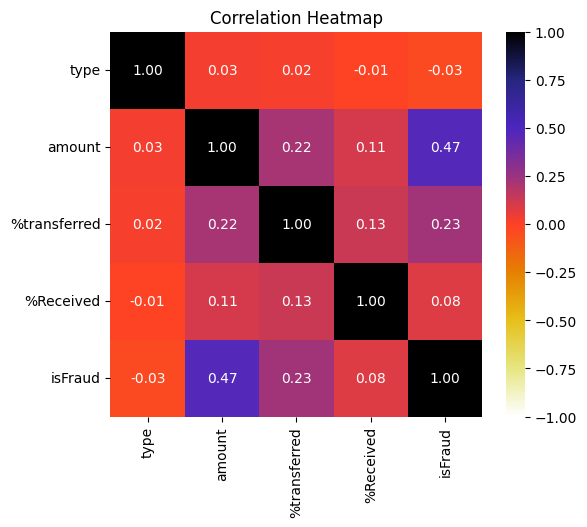

In [75]:
cor = fraud.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r, fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

So Amount and Percentage Transeffered are the most important features for Fraud Detection

Feature Importance for various Features.

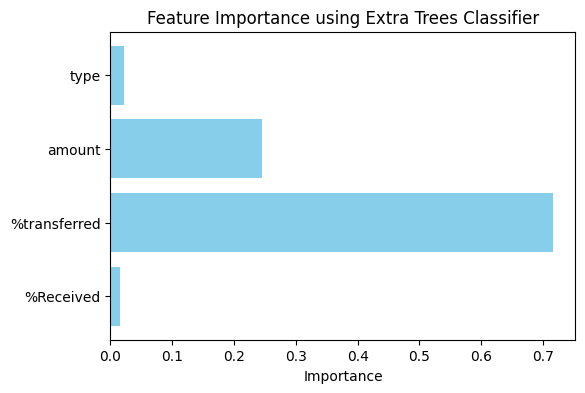

In [76]:
X = fraud.drop('isFraud', axis=1)  # Features
y = fraud['isFraud']  # Target

clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})


# Plot the feature importances
plt.figure(figsize=(6, 4))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance using Extra Trees Classifier')
plt.gca().invert_yaxis()  
plt.show()

Predictive Modelling

In [87]:
X = fraud.iloc[:, :-1].values
y = fraud.iloc[:, -1].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [89]:
X_train.shape

(218821, 4)

In [90]:
y_train.shape

(218821,)

In [92]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Building the ANN for Predictive Modelling.

In [97]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Output layer

In [98]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [99]:
ann.fit(X_train, y_train, batch_size = 128, epochs = 20)

Epoch 1/20
1710/1710 [==============================] - 7s 3ms/step - loss: 52.8115 - accuracy: 0.8359
Epoch 2/20
1710/1710 [==============================] - 6s 3ms/step - loss: 10.8442 - accuracy: 0.8795
Epoch 3/20
1710/1710 [==============================] - 5s 3ms/step - loss: 3.8972 - accuracy: 0.9163
Epoch 4/20
1710/1710 [==============================] - 5s 3ms/step - loss: 1.6252 - accuracy: 0.9418
Epoch 5/20
1710/1710 [==============================] - 4s 3ms/step - loss: 0.7133 - accuracy: 0.9603
Epoch 6/20
1710/1710 [==============================] - 5s 3ms/step - loss: 0.1244 - accuracy: 0.9843
Epoch 7/20
1710/1710 [==============================] - 4s 3ms/step - loss: 0.0625 - accuracy: 0.9881
Epoch 8/20
1710/1710 [==============================] - 7s 4ms/step - loss: 0.0500 - accuracy: 0.9896
Epoch 9/20
1710/1710 [==============================] - 5s 3ms/step - loss: 0.7060 - accuracy: 0.9824
Epoch 10/20
1710/1710 [==============================] - 5s 3ms/step - loss: 0.0

In [100]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

1710/1710 [==============================] - 4s 3ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy*100,'%')

[[53921     0]
 [  785     0]]
Accuracy Score :  98.56505684934011 %


So the Model is working well with a 98% Accuracy Score on the test set.